In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
year = 2020
url = "https://www.basketball-reference.com/leagues/NBA_{}_per_game.html".format(year)

In [3]:
page = requests.get(url)
soup = BeautifulSoup(page.text,'html.parser')

In [4]:
soup.findAll('tr',limit=2)
headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]
headers = headers[1:]

In [5]:
rows = soup.findAll('tr')[1:]
player_stats = [[td.getText() for td in rows[i].findAll('td')] for i in range(len(rows))]
stats = pd.DataFrame(player_stats,columns = headers)

In [6]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677 entries, 0 to 676
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Player  651 non-null    object
 1   Pos     651 non-null    object
 2   Age     651 non-null    object
 3   Tm      651 non-null    object
 4   G       651 non-null    object
 5   GS      651 non-null    object
 6   MP      651 non-null    object
 7   FG      651 non-null    object
 8   FGA     651 non-null    object
 9   FG%     651 non-null    object
 10  3P      651 non-null    object
 11  3PA     651 non-null    object
 12  3P%     651 non-null    object
 13  2P      651 non-null    object
 14  2PA     651 non-null    object
 15  2P%     651 non-null    object
 16  eFG%    651 non-null    object
 17  FT      651 non-null    object
 18  FTA     651 non-null    object
 19  FT%     651 non-null    object
 20  ORB     651 non-null    object
 21  DRB     651 non-null    object
 22  TRB     651 non-null    ob

In [7]:
stats.describe()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,651,651,651,651,651,651,651,651,651,651,...,651,651,651,651,651,651,651,651,651,651
unique,529,14,22,31,74,72,276,95,175,274,...,272,40,86,103,72,22,25,43,41,207
top,Jordan McRae,SG,22,TOT,58,0,34.3,1.3,4.0,.500,...,1.0,0.3,1.6,2.3,0.8,0.4,0.1,0.8,1.9,1.0
freq,4,143,79,60,17,191,6,28,11,17,...,34,74,22,23,34,77,109,49,39,11


In [8]:
stats.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,.592,...,.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
1,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,.557,...,.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
2,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,.493,...,.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,Kyle Alexander,C,23,MIA,2,0,6.5,0.5,1.0,.500,...,,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0
4,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,.368,...,.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7


In [27]:
rowindex = ['Age','G','GS','MP','FG','FGA','FG%','3P','3PA','3P%','2P','2PA','2P%','eFG%','FT','FTA','FT%','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS']
age, G, GS, MP, FG, FGA, FGper, s3P, s3PA, s3Pper, s2P, s2PA, s2Pper, eFGper, FT, FTA, FTper, ORB, DRB,TRB, AST, STL, BLK, TOV,PF,PTS = 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB','AST','STL','BLK','TOV','PF','PTS'

In [28]:
for i in rowindex:
    stats[i] = stats[i].apply(pd.to_numeric)


stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677 entries, 0 to 676
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  651 non-null    object 
 1   Pos     651 non-null    object 
 2   Age     651 non-null    float64
 3   Tm      651 non-null    object 
 4   G       651 non-null    float64
 5   GS      651 non-null    float64
 6   MP      651 non-null    float64
 7   FG      651 non-null    float64
 8   FGA     651 non-null    float64
 9   FG%     649 non-null    float64
 10  3P      651 non-null    float64
 11  3PA     651 non-null    float64
 12  3P%     616 non-null    float64
 13  2P      651 non-null    float64
 14  2PA     651 non-null    float64
 15  2P%     645 non-null    float64
 16  eFG%    649 non-null    float64
 17  FT      651 non-null    float64
 18  FTA     651 non-null    float64
 19  FT%     618 non-null    float64
 20  ORB     651 non-null    float64
 21  DRB     651 non-null    float64
 22  TR

In [36]:
stats.groupby('Tm')[FG].max()

Tm
ATL     9.1
BOS     8.4
BRK    10.0
CHI     9.0
CHO     6.3
CLE     7.9
DAL     9.5
DEN     7.7
DET     7.4
GSW     8.3
HOU    10.6
IND     8.0
LAC     9.3
LAL     9.6
MEM     6.7
MIA     6.1
MIL    10.9
MIN     9.0
NOP     8.8
NYK     7.2
OKC     7.0
ORL     8.0
PHI     7.7
PHO     9.0
POR     9.5
SAC     7.7
SAS     8.2
TOR     8.3
TOT     8.1
UTA     8.7
WAS    10.4
Name: FG, dtype: float64

In [11]:
import seaborn as sns

<AxesSubplot:xlabel='eFG%', ylabel='Count'>

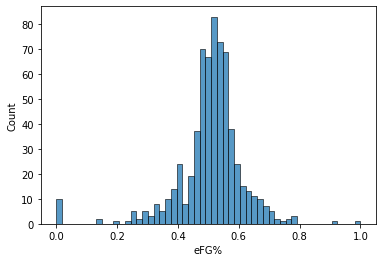

In [31]:
sns.histplot(x=eFGper, data = stats)

<AxesSubplot:xlabel='2P%', ylabel='Count'>

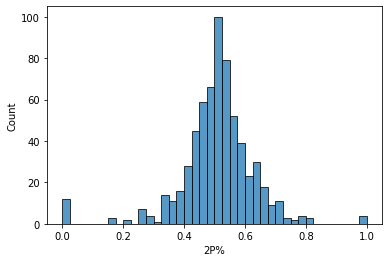

In [32]:
sns.histplot(x=s2Pper,data=stats)

<AxesSubplot:xlabel='3P%', ylabel='Count'>

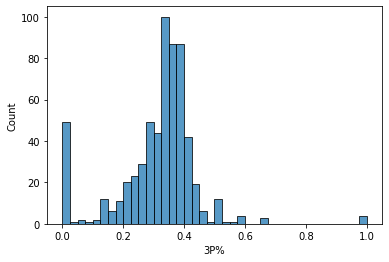

In [33]:
sns.histplot(x=s3Pper,data=stats)

<AxesSubplot:>

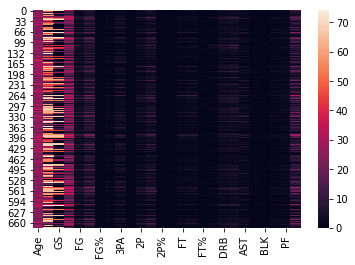